In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [4]:
apple_stk=pd.read_csv("AAPL.csv")

In [5]:
apple_stk

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


# Splitting Data to Train & Test

In [6]:
a = apple_stk
size = int(len(a) * 0.75)
print(size)
Train, Test = a[0:size], a[size:len(a)]

1508


In [7]:
Train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
1503,2017-12-21,174.169998,176.020004,174.100006,175.009995,168.705246,20949900
1504,2017-12-22,174.679993,175.419998,174.500000,175.009995,168.705246,16349400
1505,2017-12-26,170.800003,171.470001,169.679993,170.570007,164.425217,33185500
1506,2017-12-27,170.100006,170.779999,169.710007,170.600006,164.454132,21498200


In [8]:
Test

,Date,Open,High,Low,Close,Adj Close,Volume
1508,2017-12-29,170.520004,170.589996,169.220001,169.229996,163.133469,25999900
1509,2018-01-02,170.160004,172.300003,169.259995,172.259995,166.054321,25555900
1510,2018-01-03,172.529999,174.550003,171.960007,172.229996,166.025375,29517900
1511,2018-01-04,172.539993,173.470001,172.080002,173.029999,166.796555,22434600
1512,2018-01-05,173.440002,175.369995,173.050003,175.000000,168.695572,23660000
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# ARIMA Model

ACF and PACF Plots

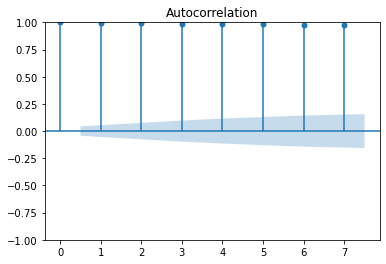

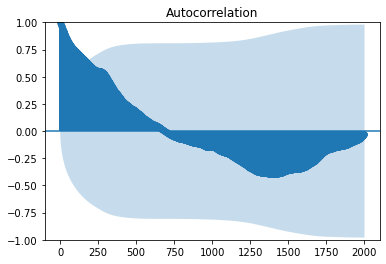

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(apple_stk.Close, lags=7)
plot_acf(apple_stk.Close, lags=2000)
plt.show() 

We can see all the lags are beyond the blue color zone, so we can say the data is non-stationary.

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


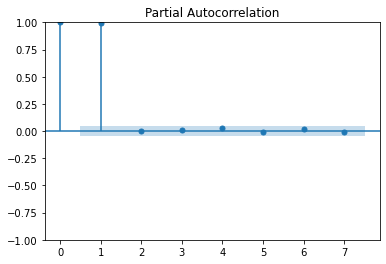

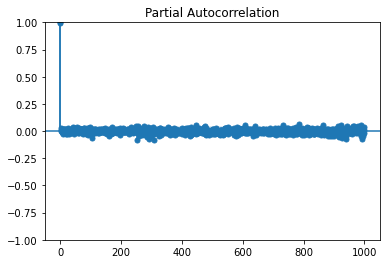

In [11]:
plot_pacf(apple_stk.Close, lags=7)
plot_pacf(apple_stk.Close, lags=1000)
plt.show() 

We can see only one is significant in above PACF plot , so we can apply ARIMA model with AR-1 for this data.

In [12]:
## Dicky Fuller Test
from statsmodels.tsa.stattools import adfuller
adfuller(apple_stk['Close'])

(1.2193701254378042,
 0.996117017803201,
 9,
 2001,
 {'1%': -3.433622218212895,
  '5%': -2.8629854902259004,
  '10%': -2.5675395171404802},
 8633.09680956294)

We can see the probability value is more than 0.05. So we can say it is non-stationary data.

<Figure size 432x288 with 0 Axes>

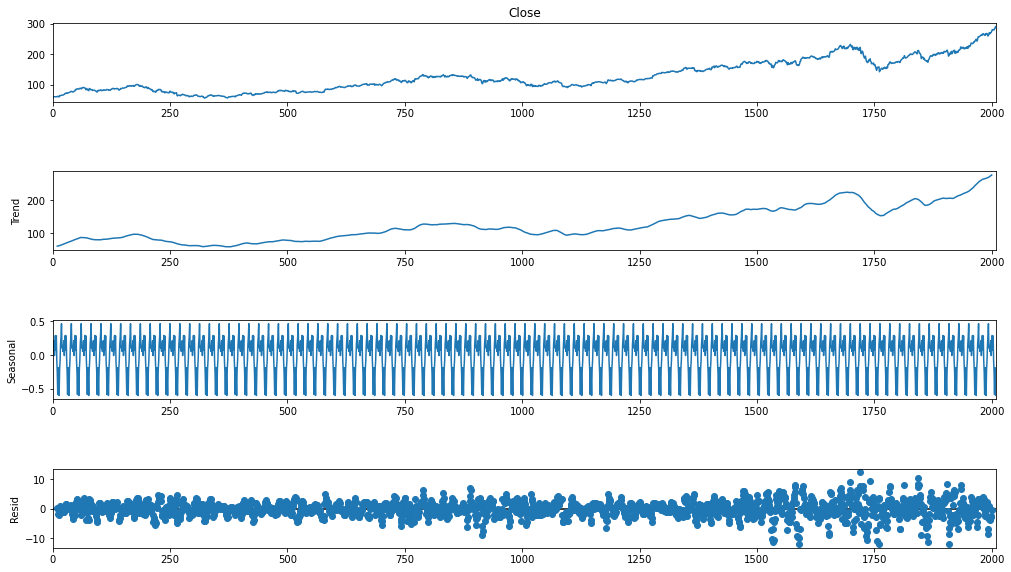

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(apple_stk['Close'],period=21)
fig = plt.figure()  
fig = decompose_ts_add.plot()  
fig.set_size_inches(16, 9)

In above decomposition plot, we can see monthly seasonality

<Figure size 432x288 with 0 Axes>

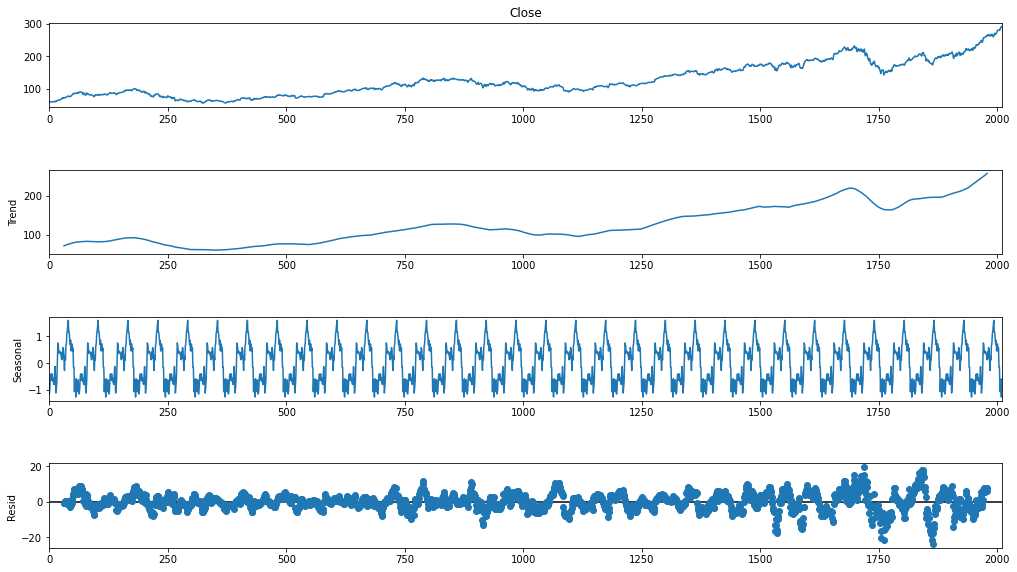

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(apple_stk['Close'],period=63)
fig = plt.figure()  
fig = decompose_ts_add.plot()  
fig.set_size_inches(16, 9)

In above decomposition plot, we can see quarterly seasonality

<Figure size 432x288 with 0 Axes>

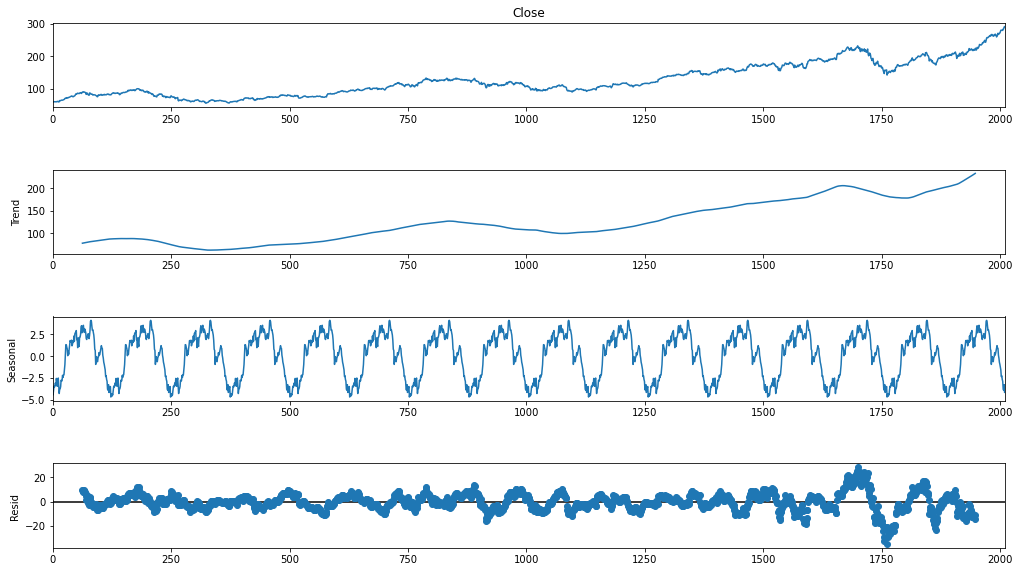

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(apple_stk['Close'],period=126)
fig = plt.figure()  
fig = decompose_ts_add.plot()  
fig.set_size_inches(16, 9)

In above decomposition plot, we can see half yearly seasonality

<Figure size 432x288 with 0 Axes>

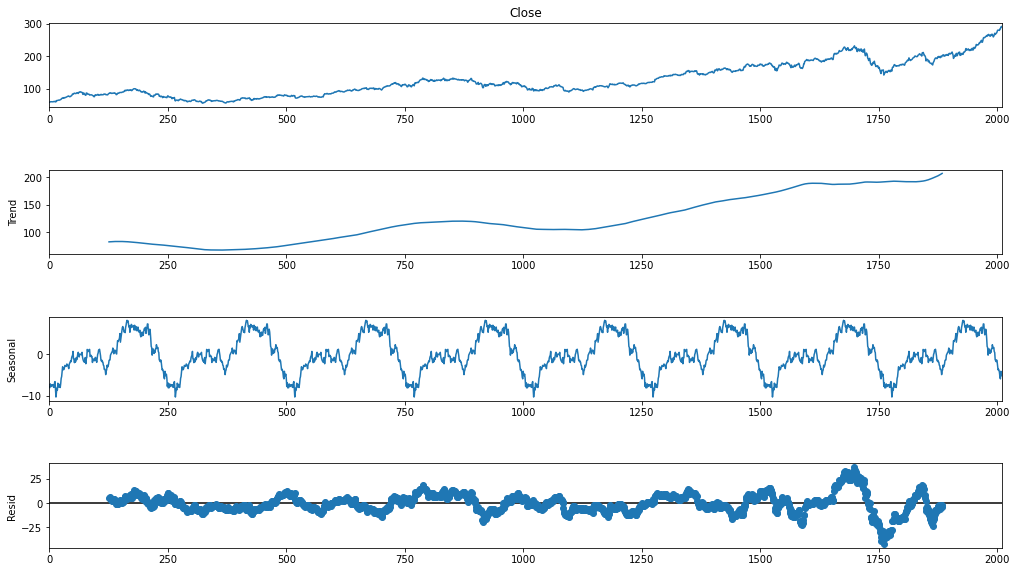

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(apple_stk['Close'],period=252)
fig = plt.figure()  
fig = decompose_ts_add.plot()  
fig.set_size_inches(16, 9)

In above decomposition plot, we can see annual seasonality

In [17]:
apple_stk['Close_diff']=apple_stk['Close'].diff()

In [18]:
## Dicky Fuller Test
from statsmodels.tsa.stattools import adfuller
adfuller(apple_stk.Close_diff[1:])

(-13.625534323873268,
 1.7631231987208899e-25,
 8,
 2001,
 {'1%': -3.433622218212895,
  '5%': -2.8629854902259004,
  '10%': -2.5675395171404802},
 8629.540212595413)

<Figure size 432x288 with 0 Axes>

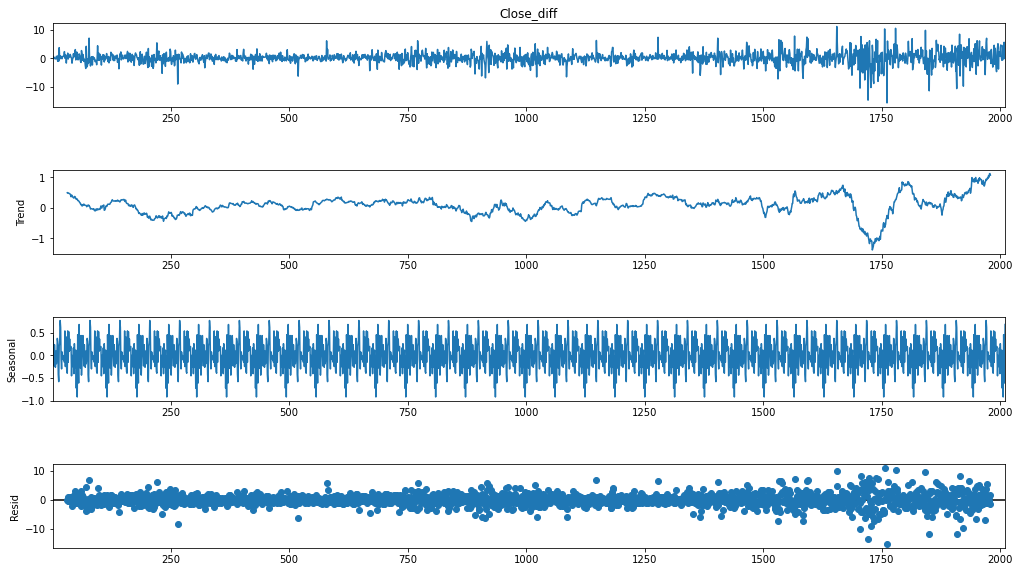

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose((apple_stk.Close_diff[1:]),period=63)
fig = plt.figure()  
fig = decompose_ts_add.plot()  
fig.set_size_inches(16, 9)

After differencing , the probability value is below 0.05 but still it has seasonality, so we can apply Sarima model for this data

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


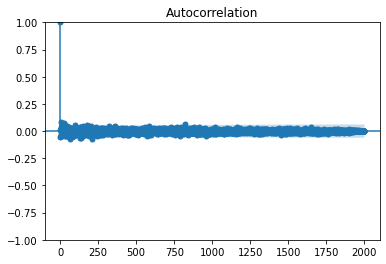

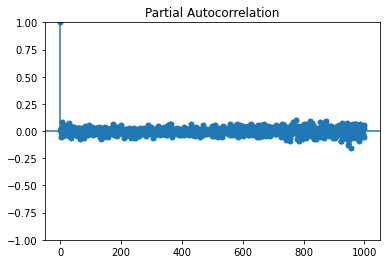

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(apple_stk.Close.diff().dropna(),lags=2000)
plot_pacf(apple_stk.Close.diff().dropna(),lags=1000)
plt.show() 

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


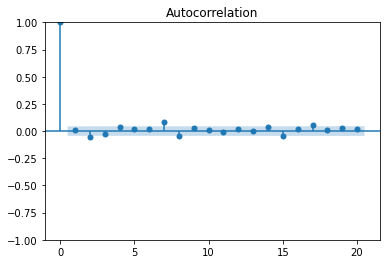

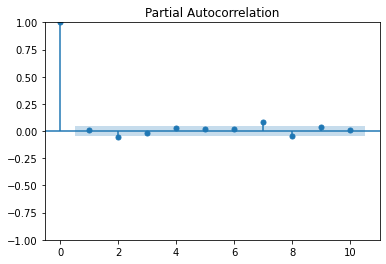

In [21]:
plot_acf(apple_stk.Close.diff().dropna(),lags=20)
plot_pacf(apple_stk.Close.diff().dropna(),lags=10)
plt.show() 

After differencing, we couldnot see significant lag in ACF and PACF plot. so we can build ARIMA model with AR component p = 0, Integrated component differencing d = 1, MA component q = 0

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


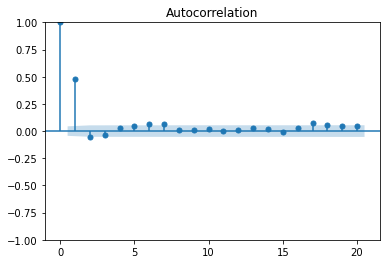

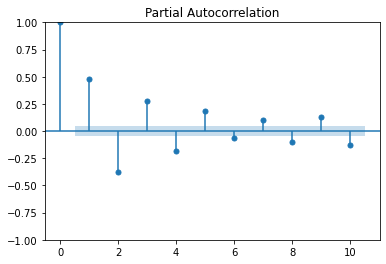

In [22]:
plot_acf(apple_stk.Close.diff(2).dropna(),lags=20)
plot_pacf(apple_stk.Close.diff(2).dropna(),lags=10)
plt.show() 

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


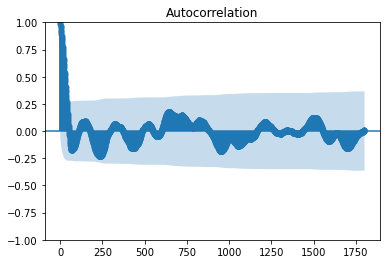

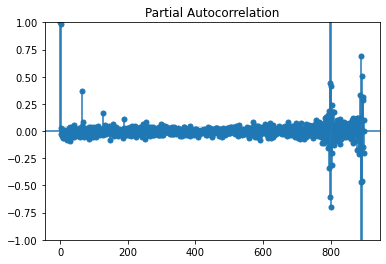

In [23]:
plot_acf(apple_stk.Close.diff(63).dropna(),lags=1800)
plot_pacf(apple_stk.Close.diff(63).dropna(),lags=900)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


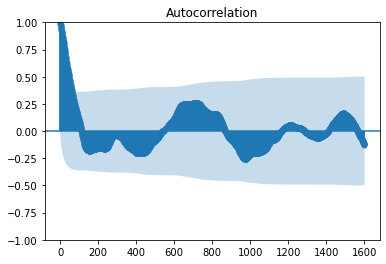

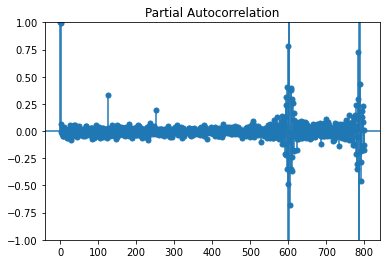

In [24]:
plot_acf(apple_stk.Close.diff(126).dropna(),lags=1600)
plot_pacf(apple_stk.Close.diff(126).dropna(),lags=800)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


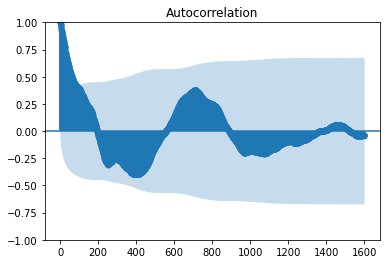

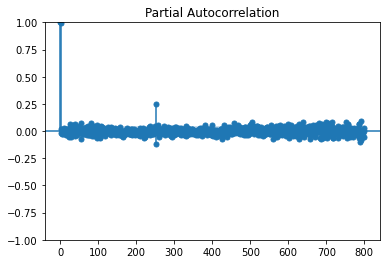

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(apple_stk.Close.diff(252).dropna(),lags=1600)
plot_pacf(apple_stk.Close.diff(252).dropna(),lags=800)
plt.show() 

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


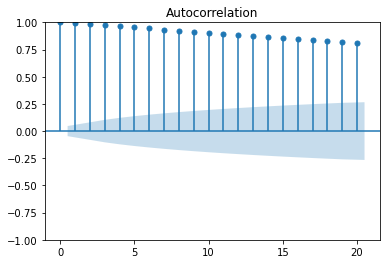

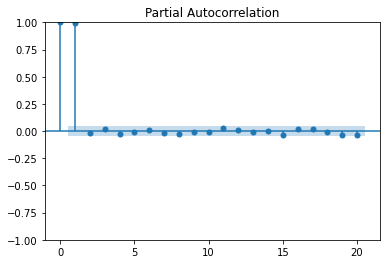

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(apple_stk.Close.diff(252).dropna(),lags=20)
plot_pacf(apple_stk.Close.diff(252).dropna(),lags=20)
plt.show() 

In [27]:
X = apple_stk['Close'].values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]

In [28]:
from statsmodels.tsa.arima.model import ARIMA
arima1 = ARIMA(train, order=(0,2,1))
predictions_trn = arima1.fit().predict(start = Train.index[0],end = Train.index[-1])
predictions_tst = arima1.fit().predict(start = Test.index[0],end = Test.index[-1])


In [29]:
A_rmse_tr = sqrt(mean_squared_error(train, predictions_trn))
print('Train RMSE: %.3f' % A_rmse_tr)
A_rmse_ts = sqrt(mean_squared_error(test, predictions_tst))
print('Test RMSE: %.3f' % A_rmse_ts)

Train RMSE: 2.288
Test RMSE: 24.534


In [30]:
arima1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1508
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -2794.112
Date:                Tue, 11 Apr 2023   AIC                           5592.224
Time:                        00:49:14   BIC                           5602.859
Sample:                             0   HQIC                          5596.185
                               - 1508                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9989      0.004   -244.584      0.000      -1.007      -0.991
sigma2         2.3839      0.052     45.728      0.000       2.282       2.486
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):               836.57
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
predictions_trn

array([  0.        ,  88.1207145 ,  59.37871339, ..., 175.10201762,
       170.65671208, 170.68664455])

In [32]:
predictions_tst

array([171.16710194, 171.25420188, 171.34130182, 171.42840176,
       171.51550171, 171.60260165, 171.68970159, 171.77680153,
       171.86390147, 171.95100141, 172.03810135, 172.12520129,
       172.21230123, 172.29940117, 172.38650112, 172.47360106,
       172.560701  , 172.64780094, 172.73490088, 172.82200082,
       172.90910076, 172.9962007 , 173.08330064, 173.17040058,
       173.25750053, 173.34460047, 173.43170041, 173.51880035,
       173.60590029, 173.69300023, 173.78010017, 173.86720011,
       173.95430005, 174.04139999, 174.12849994, 174.21559988,
       174.30269982, 174.38979976, 174.4768997 , 174.56399964,
       174.65109958, 174.73819952, 174.82529946, 174.9123994 ,
       174.99949935, 175.08659929, 175.17369923, 175.26079917,
       175.34789911, 175.43499905, 175.52209899, 175.60919893,
       175.69629887, 175.78339881, 175.87049876, 175.9575987 ,
       176.04469864, 176.13179858, 176.21889852, 176.30599846,
       176.3930984 , 176.48019834, 176.56729828, 176.65

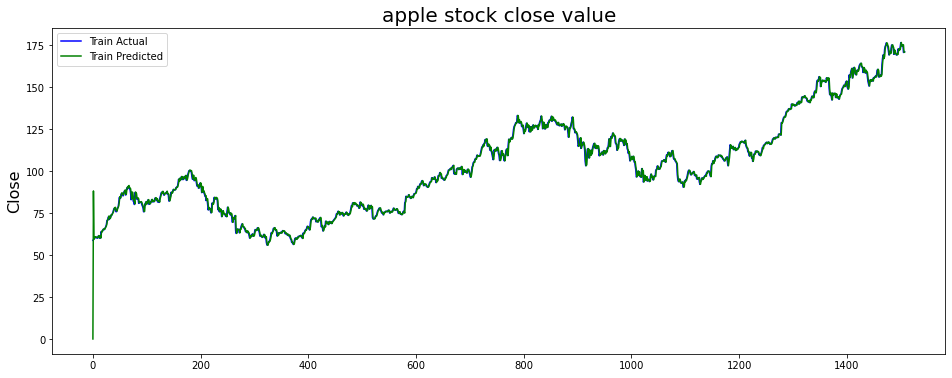

In [33]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='blue')
plt.plot(predictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()

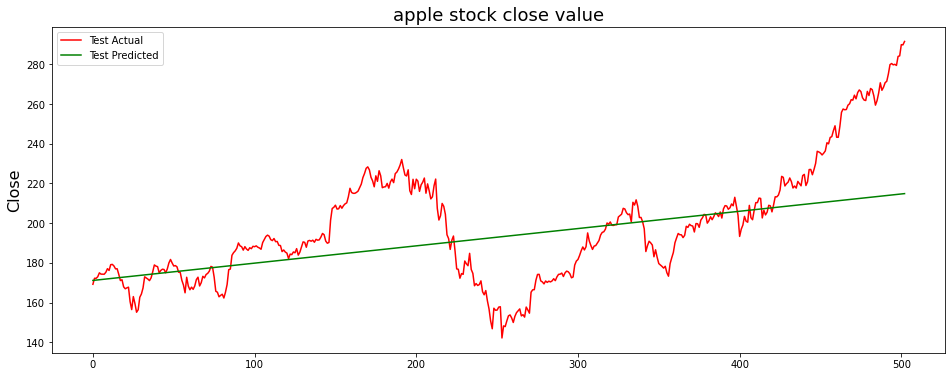

In [34]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(predictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

In [36]:
from statsmodels.tsa.arima.model import ARIMA
arima1 = ARIMA(train, order=(1,1,0))
predictions_trn = arima1.fit().predict(start = Train.index[0],end = Train.index[-1])
predictions_tst = arima1.fit().predict(start = Test.index[0],end = Test.index[-1])

In [37]:
A_rmse_tr = sqrt(mean_squared_error(train, predictions_trn))
print('Train RMSE: %.3f' % A_rmse_tr)
A_rmse_ts = sqrt(mean_squared_error(test, predictions_tst))
print('Test RMSE: %.3f' % A_rmse_ts)

Train RMSE: 2.161
Test RMSE: 40.362


In [38]:
arima1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1508
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2792.999
Date:                Tue, 11 Apr 2023   AIC                           5589.997
Time:                        00:51:41   BIC                           5600.633
Sample:                             0   HQIC                          5593.958
                               - 1508                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0261      0.021      1.217      0.223      -0.016       0.068
sigma2         2.3841      0.052     46.147      0.000       2.283       2.485
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               870.02
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

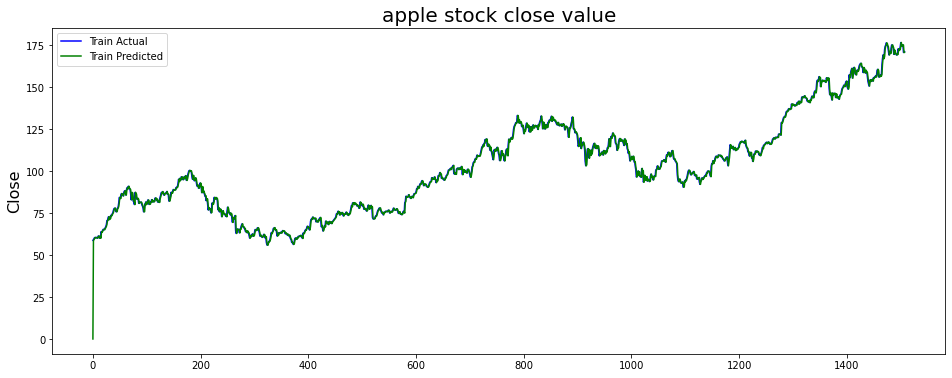

In [39]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='blue')
plt.plot(predictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()

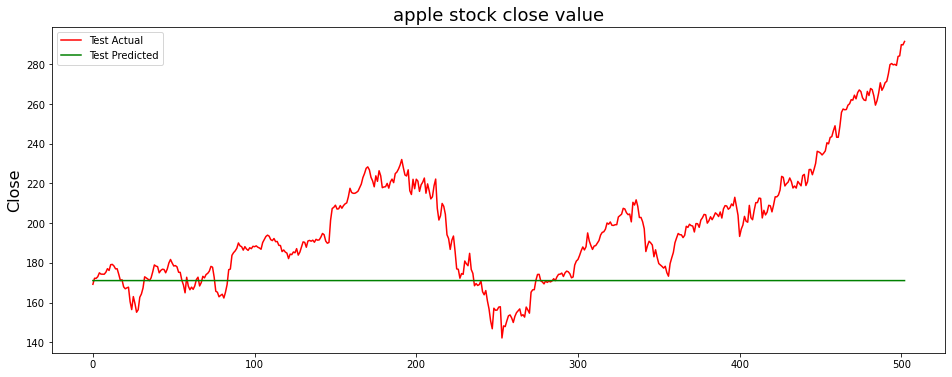

In [40]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(predictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

In [41]:
from statsmodels.tsa.arima.model import ARIMA
arima1 = ARIMA(train, order=(0,1,0))
predictions_trn = arima1.fit().predict(start = Train.index[0],end = Train.index[-1])
predictions_tst = arima1.fit().predict(start = Test.index[0],end = Test.index[-1])

In [42]:
A_rmse_tr = sqrt(mean_squared_error(train, predictions_trn))
print('Train RMSE: %.3f' % A_rmse_tr)
A_rmse_ts = sqrt(mean_squared_error(test, predictions_tst))
print('Test RMSE: %.3f' % A_rmse_ts)

Train RMSE: 2.162
Test RMSE: 40.371


In [43]:
arima1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1508
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2793.514
Date:                Tue, 11 Apr 2023   AIC                           5589.028
Time:                        00:51:42   BIC                           5594.345
Sample:                             0   HQIC                          5591.008
                               - 1508                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.3857      0.052     46.144      0.000       2.284       2.487
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):               862.52
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

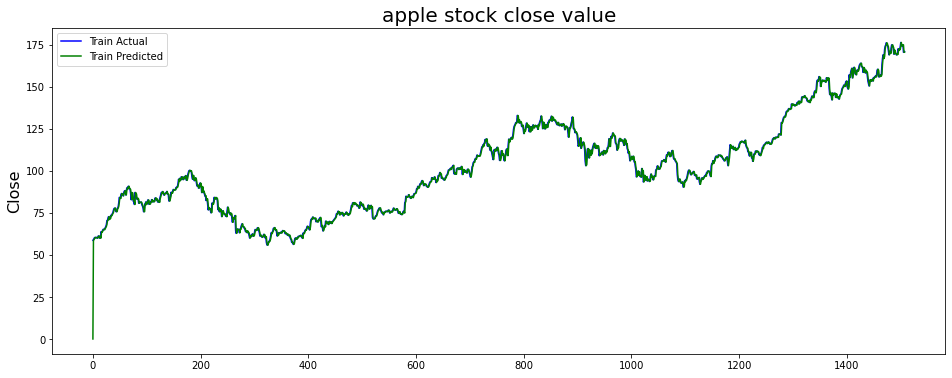

In [44]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='blue')
plt.plot(predictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()

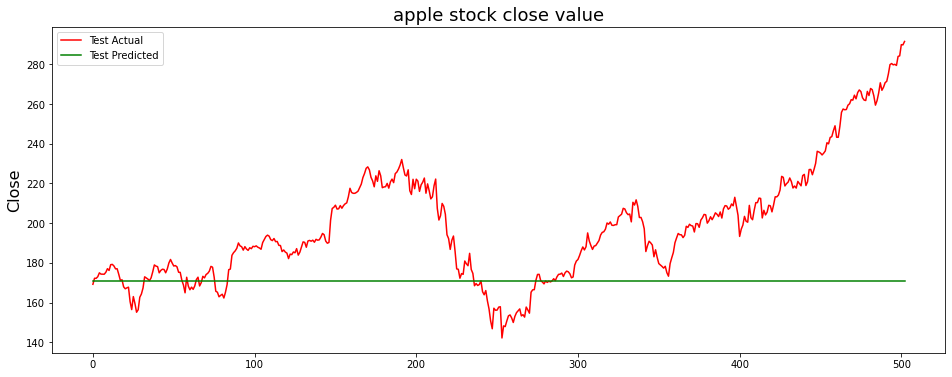

In [45]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(predictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

In [46]:
from statsmodels.tsa.arima.model import ARIMA
arima1 = ARIMA(train, order=(1,2,0))
predictions_trn = arima1.fit().predict(start = Train.index[0],end = Train.index[-1])
predictions_tst = arima1.fit().predict(start = Test.index[0],end = Test.index[-1])

In [47]:
arima1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1508
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -3106.823
Date:                Tue, 11 Apr 2023   AIC                           6217.647
Time:                        00:51:43   BIC                           6228.281
Sample:                             0   HQIC                          6221.608
                               - 1508                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4691      0.018    -26.296      0.000      -0.504      -0.434
sigma2         3.6251      0.086     42.086      0.000       3.456       3.794
===================================================================================
Ljung-Box (L1) (Q):                  35.74   Jarque-Bera (JB):               477.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
A_rmse_tr = sqrt(mean_squared_error(train, predictions_trn))
print('Train RMSE: %.3f' % A_rmse_tr)
A_rmse_ts = sqrt(mean_squared_error(test, predictions_tst))
print('Test RMSE: %.3f' % A_rmse_ts)

Train RMSE: 2.543
Test RMSE: 68.885


In [49]:
arima1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1508
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -3106.823
Date:                Tue, 11 Apr 2023   AIC                           6217.647
Time:                        00:51:44   BIC                           6228.281
Sample:                             0   HQIC                          6221.608
                               - 1508                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4691      0.018    -26.296      0.000      -0.504      -0.434
sigma2         3.6251      0.086     42.086      0.000       3.456       3.794
===================================================================================
Ljung-Box (L1) (Q):                  35.74   Jarque-Bera (JB):               477.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
from statsmodels.tsa.arima.model import ARIMA
arima1 = ARIMA(train, order=(1,2,1))
predictions_trn = arima1.fit().predict(start = Train.index[0],end = Train.index[-1])
predictions_tst = arima1.fit().predict(start = Test.index[0],end = Test.index[-1])

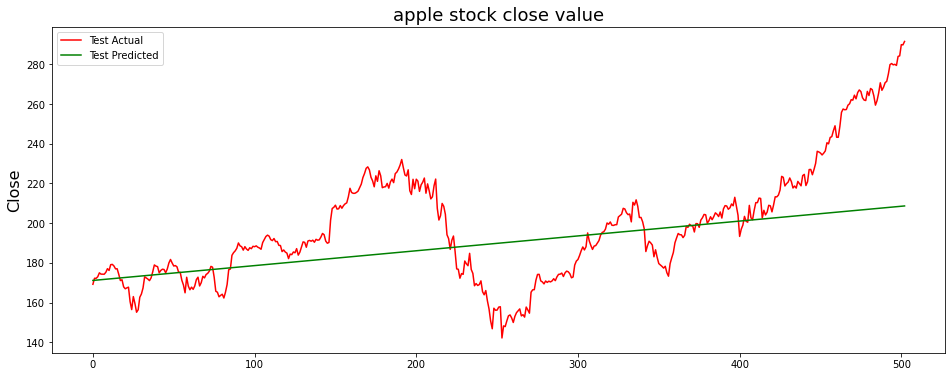

In [51]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(predictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

In [52]:
A_rmse_tr = sqrt(mean_squared_error(train, predictions_trn))
print('Train RMSE: %.3f' % A_rmse_tr)
A_rmse_ts = sqrt(mean_squared_error(test, predictions_tst))
print('Test RMSE: %.3f' % A_rmse_ts)

Train RMSE: 2.288
Test RMSE: 25.875


In [53]:
arima1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1508
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -2793.610
Date:                Tue, 11 Apr 2023   AIC                           5593.219
Time:                        00:51:47   BIC                           5609.171
Sample:                             0   HQIC                          5599.160
                               - 1508                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0246      0.021      1.152      0.249      -0.017       0.066
ma.L1         -0.9999      0.031    -32.550      0.000      -1.060      -0.940
sigma2         2.3806      0.087     27.290      0.000       2.210       2.552
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               843.00
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

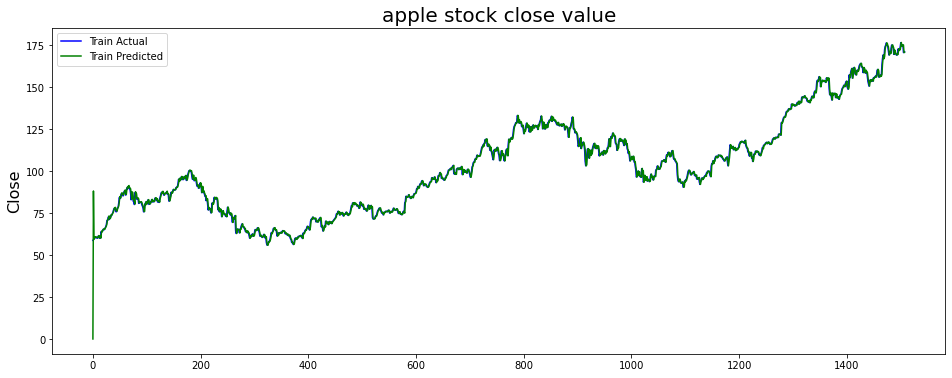

In [54]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='blue')
plt.plot(predictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()

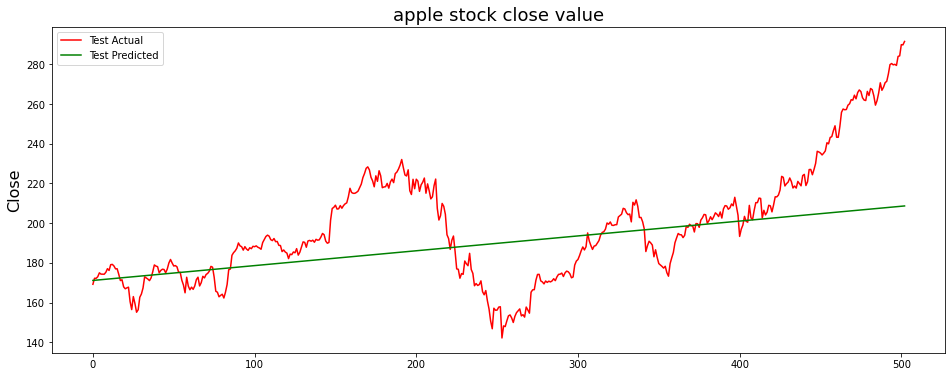

In [55]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(predictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

In [56]:
from statsmodels.tsa.arima.model import ARIMA
arima1 = ARIMA(train, order=(1,2,2))
predictions_trn = arima1.fit().predict(start = Train.index[0],end = Train.index[-1])
predictions_tst = arima1.fit().predict(start = Test.index[0],end = Test.index[-1])

In [57]:
A_rmse_tr = sqrt(mean_squared_error(train, predictions_trn))
print('Train RMSE: %.3f' % A_rmse_tr)
A_rmse_ts = sqrt(mean_squared_error(test, predictions_tst))
print('Test RMSE: %.3f' % A_rmse_ts)

Train RMSE: 2.288
Test RMSE: 25.846


In [58]:
arima1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1508
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -2793.637
Date:                Tue, 11 Apr 2023   AIC                           5595.274
Time:                        00:51:50   BIC                           5616.543
Sample:                             0   HQIC                          5603.196
                               - 1508                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9698      0.053    -18.407      0.000      -1.073      -0.867
ma.L1         -0.0242      0.050     -0.487      0.626      -0.122       0.073
ma.L2         -0.9754      0.050    -19.325      0.000      -1.074      -0.876
sigma2         2.3808      0.067     35.726      0.000       2.250       2.511
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):               843.16
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

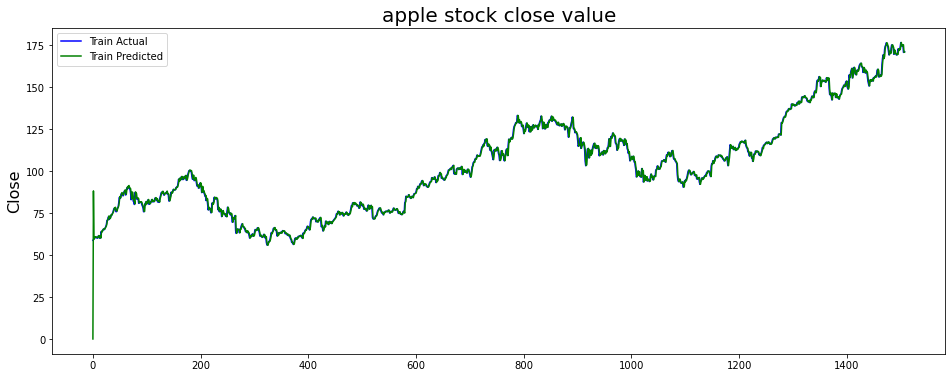

In [59]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='blue')
plt.plot(predictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()

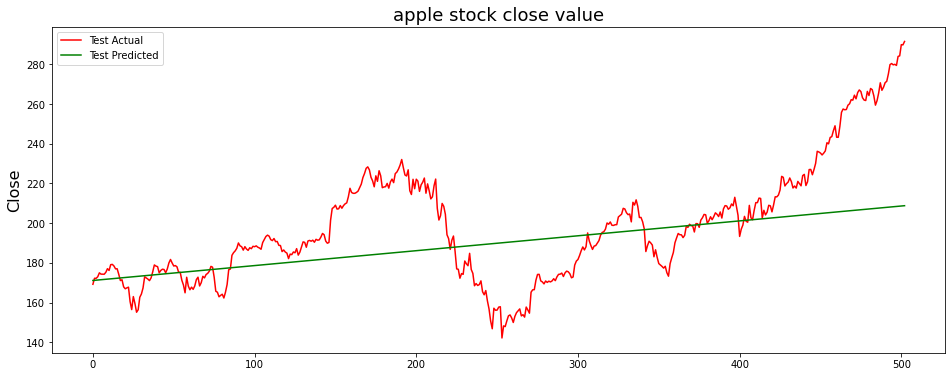

In [60]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(predictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

In [61]:
from statsmodels.tsa.arima.model import ARIMA
arima1 = ARIMA(train, order=(0,1,2))
predictions_trn = arima1.fit().predict(start = Train.index[0],end = Train.index[-1])
predictions_tst = arima1.fit().predict(start = Test.index[0],end = Test.index[-1])

In [62]:
A_rmse_tr = sqrt(mean_squared_error(train, predictions_trn))
print('Train RMSE: %.3f' % A_rmse_tr)
A_rmse_ts = sqrt(mean_squared_error(test, predictions_tst))
print('Test RMSE: %.3f' % A_rmse_ts)

Train RMSE: 2.161
Test RMSE: 40.375


In [63]:
arima1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1508
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -2792.215
Date:                Tue, 11 Apr 2023   AIC                           5590.431
Time:                        00:51:52   BIC                           5606.384
Sample:                             0   HQIC                          5596.373
                               - 1508                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0255      0.022      1.183      0.237      -0.017       0.068
ma.L2         -0.0309      0.025     -1.225      0.220      -0.080       0.019
sigma2         2.3816      0.052     45.717      0.000       2.280       2.484
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               860.34
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
from statsmodels.tsa.arima.model import ARIMA
arima1 = ARIMA(train, order=(1,1,1))
predictions_trn = arima1.fit().predict(start = Train.index[0],end = Train.index[-1])
predictions_tst = arima1.fit().predict(start = Test.index[0],end = Test.index[-1])

In [65]:
A_rmse_tr = sqrt(mean_squared_error(train, predictions_trn))
print('Train RMSE: %.3f' % A_rmse_tr)
A_rmse_ts = sqrt(mean_squared_error(test, predictions_tst))
print('Test RMSE: %.3f' % A_rmse_ts)

Train RMSE: 2.161
Test RMSE: 40.371


In [66]:
arima1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1508
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2792.726
Date:                Tue, 11 Apr 2023   AIC                           5591.453
Time:                        00:51:53   BIC                           5607.407
Sample:                             0   HQIC                          5597.395
                               - 1508                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3060      0.662     -0.462      0.644      -1.604       0.992
ma.L1          0.3368      0.657      0.513      0.608      -0.951       1.624
sigma2         2.3832      0.052     46.177      0.000       2.282       2.484
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               870.33
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As Arima models donot predict seasonality, so did not get good results with Arima model. 
So, we can apply sarima model to build the model

# SARIMA Model

In [67]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, 
                 order=(1,1,0),
                seasonal_order=(1,1,0,21))
res=sarima.fit()
spredictions_trn = sarima.fit().predict(start = Train.index[0],end = Train.index[-1])
spredictions_tst = sarima.fit().predict(start = Test.index[0],end = Test.index[-1])


In [68]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1508
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 21)   Log Likelihood               -3084.774
Date:                            Tue, 11 Apr 2023   AIC                           6175.549
Time:                                    00:51:57   BIC                           6191.460
Sample:                                         0   HQIC                          6181.479
                                           - 1508                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0269      0.024      1.126      0.260      -0.020       0.074
ar.S.L21      -0.4741      0.018    -26.568      0.000      -0.509      -0.439
sigma2         3.7073      0.101     36.656      0.000       3.509       3.906
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               177.24
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
SA_rmse_tr = sqrt(mean_squared_error(train, spredictions_trn))
print('Train RMSE: %.3f' % SA_rmse_tr)
SA_rmse_ts = sqrt(mean_squared_error(test, spredictions_tst))
print('Test RMSE: %.3f' % SA_rmse_ts)

Train RMSE: 2.557
Test RMSE: 24.109


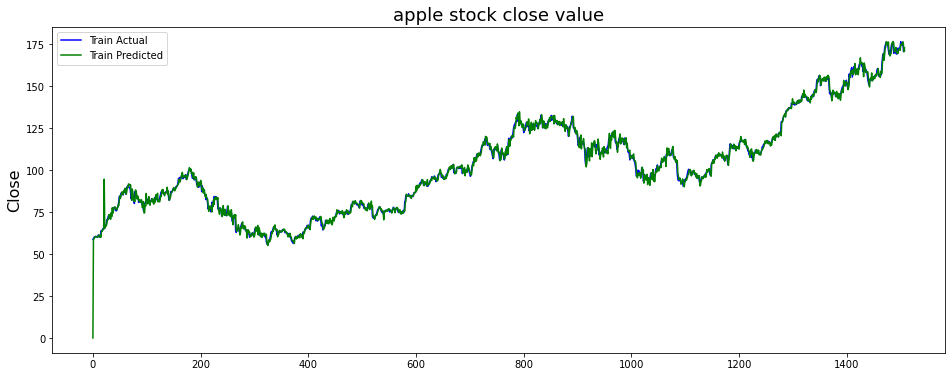

In [70]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='blue')
plt.plot(spredictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

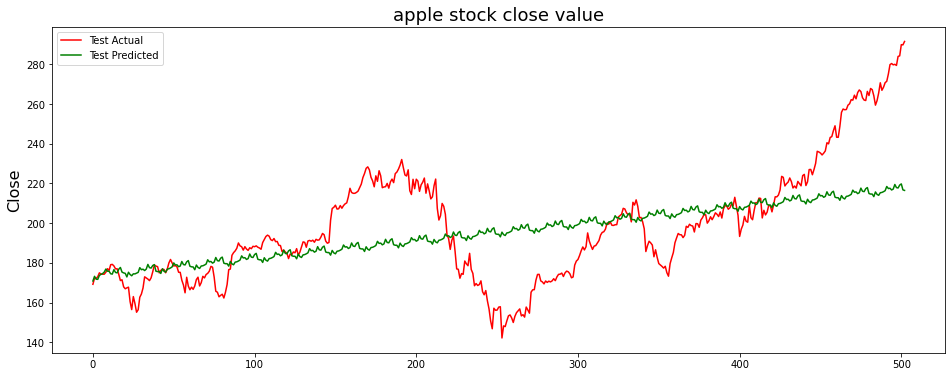

In [71]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(spredictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, 
                 order=(2,1,0),
                seasonal_order=(1,1,0,21))
spredictions_trn = sarima.fit().predict(start = Train.index[0],end = Train.index[-1])
spredictions_tst = sarima.fit().predict(start = Test.index[0],end = Test.index[-1])

In [73]:
sarima.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1508
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 21)   Log Likelihood               -3084.319
Date:                            Tue, 11 Apr 2023   AIC                           6176.639
Time:                                    00:52:03   BIC                           6197.854
Sample:                                         0   HQIC                          6184.546
                                           - 1508                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0276      0.024      1.154      0.248      -0.019       0.074
ar.L2         -0.0247      0.025     -1.002      0.317      -0.073       0.024
ar.S.L21      -0.4734      0.018    -26.497      0.000      -0.508      -0.438
sigma2         3.7051      0.101     36.590      0.000       3.507       3.904
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               176.05
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
SA_rmse_tr = sqrt(mean_squared_error(train, spredictions_trn))
print('Train RMSE: %.3f' % SA_rmse_tr)
SA_rmse_ts = sqrt(mean_squared_error(test, spredictions_tst))
print('Test RMSE: %.3f' % SA_rmse_ts)

Train RMSE: 2.557
Test RMSE: 24.036


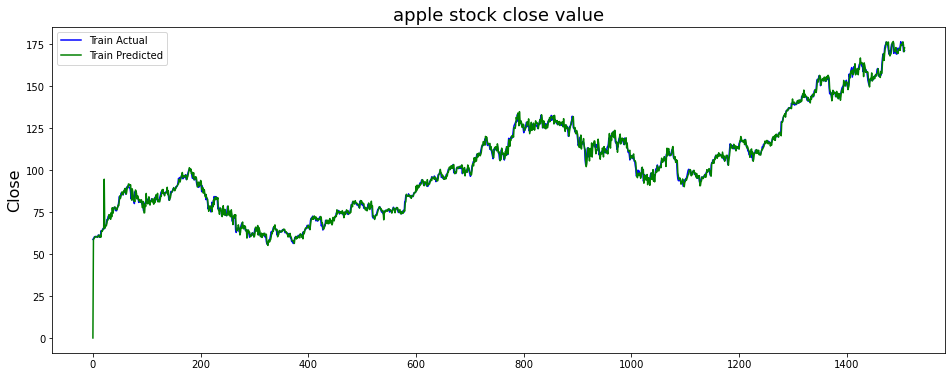

In [75]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='blue')
plt.plot(spredictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

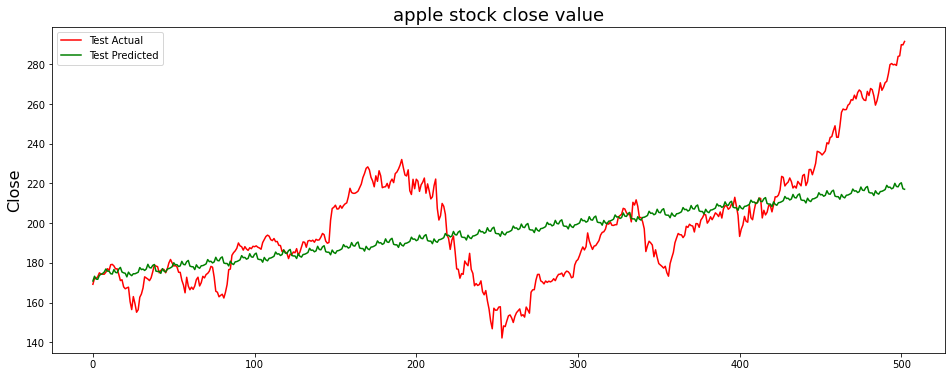

In [76]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(spredictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, 
                 order=(2,1,0),
                seasonal_order=(2,1,0,21))
spredictions_trn = sarima.fit().predict(start = Train.index[0],end = Train.index[-1])
spredictions_tst = sarima.fit().predict(start = Test.index[0],end = Test.index[-1])

In [78]:
sarima.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1508
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 21)   Log Likelihood               -2978.880
Date:                            Tue, 11 Apr 2023   AIC                           5967.760
Time:                                    00:52:18   BIC                           5994.279
Sample:                                         0   HQIC                          5977.644
                                           - 1508                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0313      0.023      1.332      0.183      -0.015       0.077
ar.L2         -0.0330      0.026     -1.276      0.202      -0.084       0.018
ar.S.L21      -0.6457      0.020    -31.561      0.000      -0.686      -0.606
ar.S.L42      -0.3679      0.020    -18.765      0.000      -0.406      -0.330
sigma2         3.2018      0.084     38.303      0.000       3.038       3.366
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               261.78
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
SA_rmse_tr = sqrt(mean_squared_error(train, spredictions_trn))
print('Train RMSE: %.3f' % SA_rmse_tr)
SA_rmse_ts = sqrt(mean_squared_error(test, spredictions_tst))
print('Test RMSE: %.3f' % SA_rmse_ts)

Train RMSE: 2.459
Test RMSE: 34.386


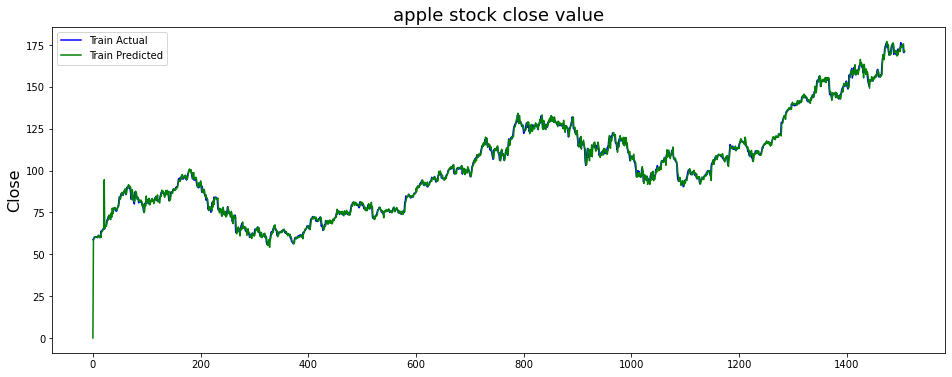

In [80]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='blue')
plt.plot(spredictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

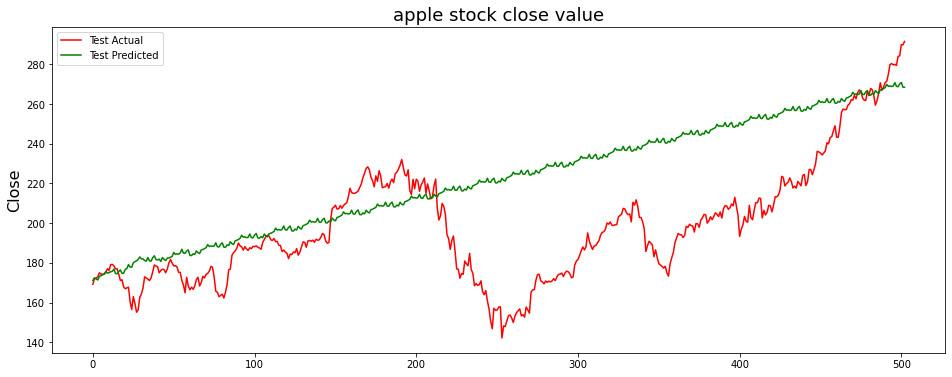

In [81]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(spredictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

In [82]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, 
                 order=(1,1,0),
                seasonal_order=(1,1,0,63))
spredictions_trn = sarima.fit().predict(start = Train.index[0],end = Train.index[-1])
spredictions_tst = sarima.fit().predict(start = Test.index[0],end = Test.index[-1])

In [83]:
sarima.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1508
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 63)   Log Likelihood               -2944.436
Date:                            Tue, 11 Apr 2023   AIC                           5894.872
Time:                                    00:53:28   BIC                           5910.698
Sample:                                         0   HQIC                          5900.779
                                           - 1508                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0142      0.023      0.620      0.535      -0.031       0.059
ar.S.L63      -0.5245      0.019    -28.279      0.000      -0.561      -0.488
sigma2         3.4084      0.076     44.563      0.000       3.258       3.558
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               741.88
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.04
Prob(H) (two-sided):                  0.03   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
SA_rmse_tr = sqrt(mean_squared_error(train, spredictions_trn))
print('Train RMSE: %.3f' % SA_rmse_tr)
SA_rmse_ts = sqrt(mean_squared_error(test, spredictions_tst))
print('Test RMSE: %.3f' % SA_rmse_ts)

Train RMSE: 2.481
Test RMSE: 46.642


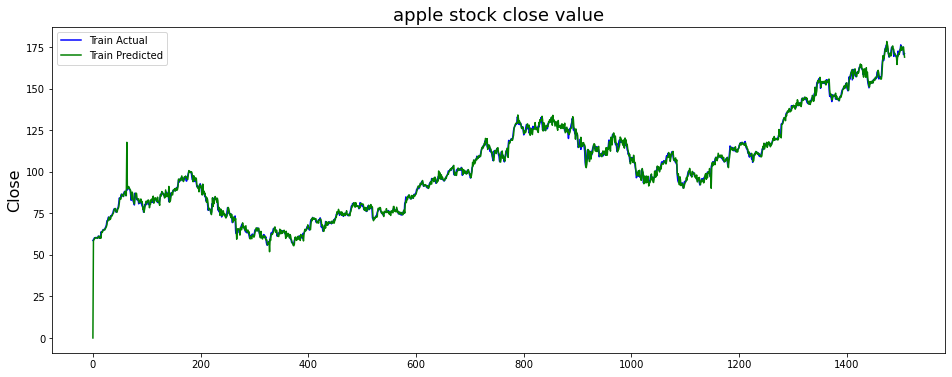

In [85]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='blue')
plt.plot(spredictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

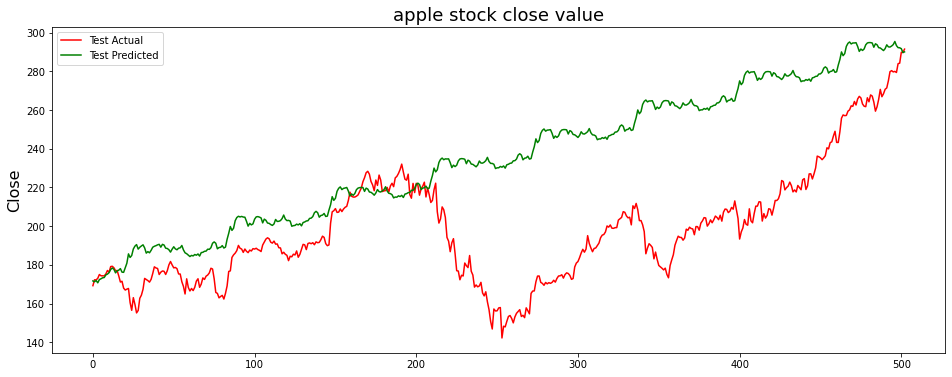

In [86]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(spredictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, 
                 order=(2,1,0),
                seasonal_order=(1,1,0,63))
spredictions_trn = sarima.fit().predict(start = Train.index[0],end = Train.index[-1])
spredictions_tst = sarima.fit().predict(start = Test.index[0],end = Test.index[-1])

In [88]:
sarima.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1508
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 63)   Log Likelihood               -2942.559
Date:                            Tue, 11 Apr 2023   AIC                           5893.118
Time:                                    00:54:21   BIC                           5914.219
Sample:                                         0   HQIC                          5900.994
                                           - 1508                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0149      0.023      0.651      0.515      -0.030       0.060
ar.L2         -0.0509      0.027     -1.897      0.058      -0.104       0.002
ar.S.L63      -0.5254      0.019    -28.222      0.000      -0.562      -0.489
sigma2         3.3994      0.076     44.603      0.000       3.250       3.549
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               746.34
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.02
Prob(H) (two-sided):                  0.03   Kurtosis:                         6.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
SA_rmse_tr = sqrt(mean_squared_error(train, spredictions_trn))
print('Train RMSE: %.3f' % SA_rmse_tr)
SA_rmse_ts = sqrt(mean_squared_error(test, spredictions_tst))
print('Test RMSE: %.3f' % SA_rmse_ts)

Train RMSE: 2.479
Test RMSE: 46.560


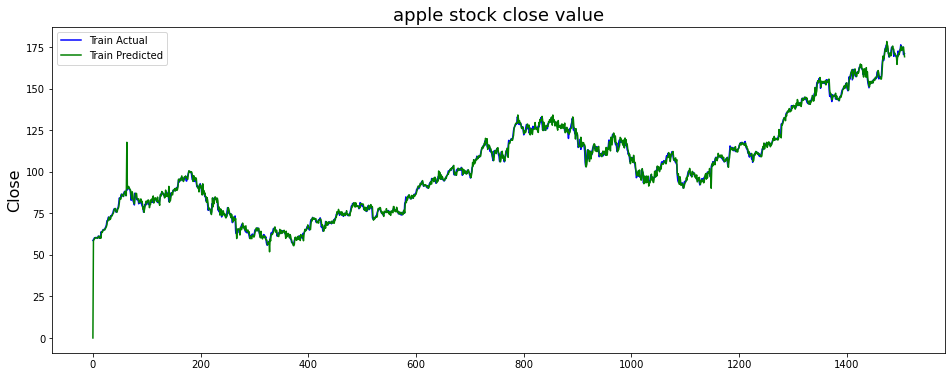

In [90]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='blue')
plt.plot(spredictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

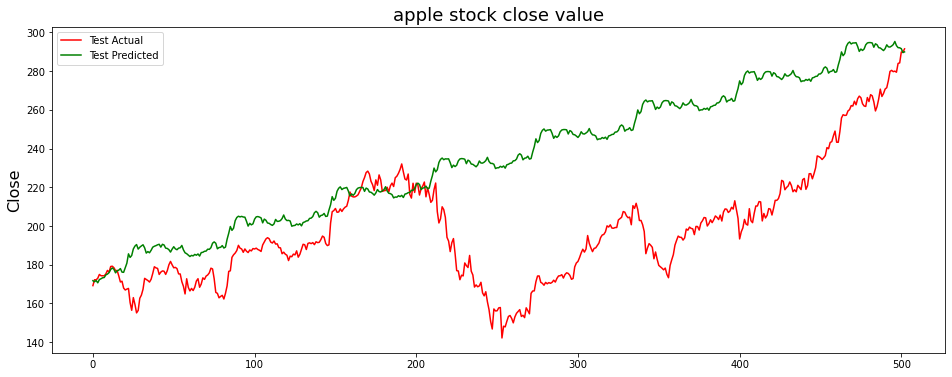

In [91]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(spredictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()